In [ ]:
import numpy as np
import matplotlib.image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
buf = matplotlib.image.imread(r'training.png')

In [ ]:
buf.shape

(1024, 1024, 3)

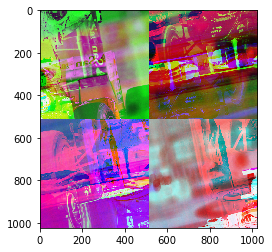

In [ ]:
plt.imshow(buf)

Выделим квадраты 

In [ ]:
b11 = buf[0:512:1,0:512:1]
b21 = buf[512:1024:1,0:512:1]
b12 = buf[0:512:1,512:1024:1]
b22 = buf[512:1024:1,512:1024:1]

In [ ]:
b = []
b.append(b11)
b.append(b12)
b.append(b21)
b.append(b22)

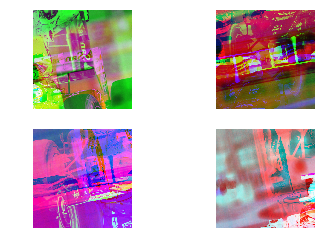

In [ ]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(b[i])
    plt.axis('off')

Выделим слои и повернем квадраты в них

In [ ]:
#1-ый слой
b1 = [b11[:,:,0],b12[:,:,0],b21[:,:,0],b22[:,:,0]]

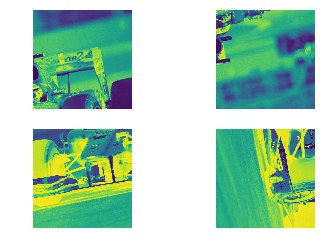

In [ ]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(b1[i])
    plt.axis('off')

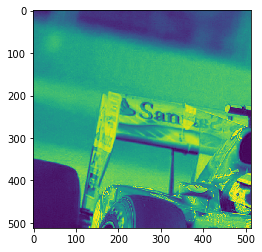

In [ ]:
plt.imshow(np.fliplr(b1[0]))

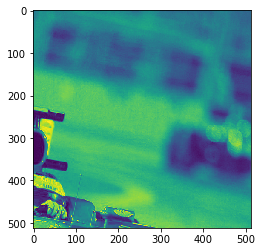

In [ ]:
plt.imshow(np.flipud(b1[1]))

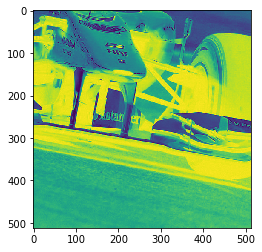

In [ ]:
plt.imshow(np.fliplr(b1[2]))

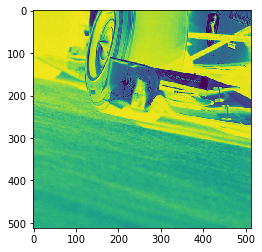

In [ ]:
plt.imshow(np.fliplr(np.rot90(b1[3])))

In [ ]:
q1 = np.concatenate((np.fliplr(b1[0]), np.flipud(b1[1])), axis=1)
q2 = np.concatenate((np.fliplr(np.rot90(b1[3])), np.fliplr(b1[2])), axis=1)

In [ ]:
b1_final = np.concatenate((q1, q2), axis=0)

In [ ]:
b1_final.shape

(1024, 1024)

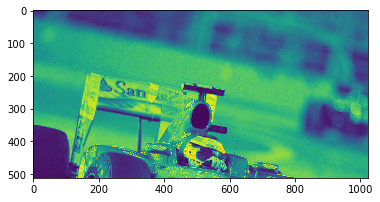

In [ ]:
plt.imshow(q1)

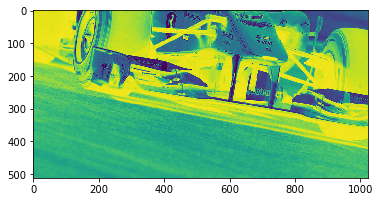

In [ ]:
plt.imshow(q2)

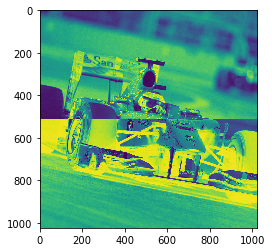

In [ ]:
plt.imshow(b1_final)

In [ ]:
#2-ый слой
b2 = [b11[:,:,1],b12[:,:,1],b21[:,:,1],b22[:,:,1]]

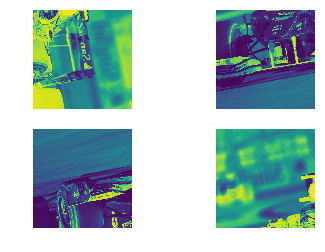

In [ ]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(b2[i])
    plt.axis('off')

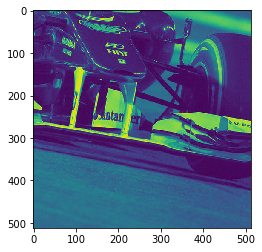

In [ ]:
plt.imshow(np.fliplr(b2[1]))

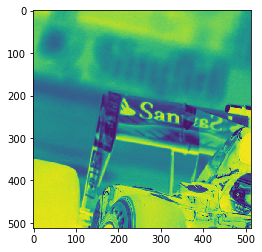

In [ ]:
с

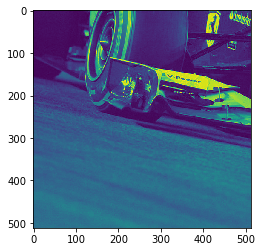

In [ ]:
plt.imshow(np.flipud(b2[2]))

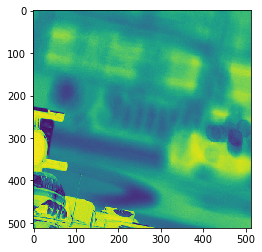

In [ ]:
plt.imshow(np.fliplr(b2[3]))

In [ ]:
w1 = np.concatenate((np.fliplr(np.rot90(b2[0])), np.fliplr(b2[3])), axis=1)
w2 = np.concatenate((np.flipud(b2[2]), np.fliplr(b2[1])), axis=1)

In [ ]:
b2_final = np.concatenate((w1,w2),axis=0)

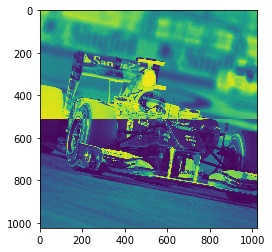

In [ ]:
plt.imshow(b2_final)

In [ ]:
#3-ий слой
b3 = [b11[:,:,2],b12[:,:,2],b21[:,:,2],b22[:,:,2]]

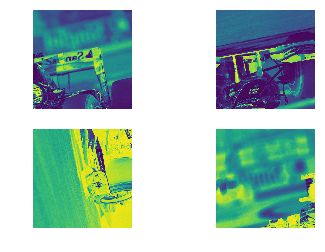

In [ ]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(b3[i])
    plt.axis('off')

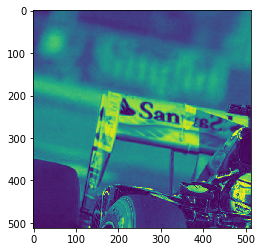

In [ ]:
plt.imshow(np.fliplr(b3[0]))

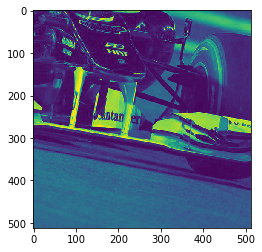

In [ ]:
plt.imshow(np.flipud(b3[1]))

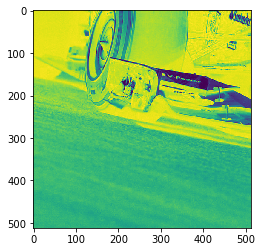

In [ ]:
с

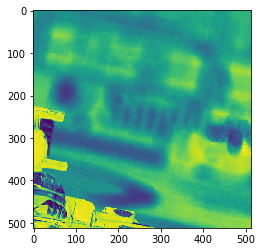

In [ ]:
plt.imshow(np.fliplr(b3[3]))

In [ ]:
e1 = np.concatenate((np.fliplr(b3[0]), np.fliplr(b3[3])), axis=1)
e2 = np.concatenate((np.fliplr(np.rot90(b3[2])), np.flipud(b3[1])), axis=1)

In [ ]:
b3_final = np.concatenate((e1,e2),axis=0)

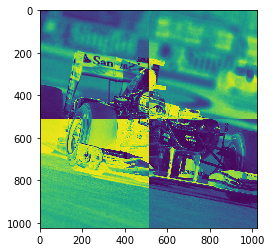

In [ ]:
plt.imshow(b3_final)

Соеденим обратно слои

In [ ]:
c

In [ ]:
b[..., 0] = b1_final
b[..., 1] = b2_final
b[..., 2] = b3_final

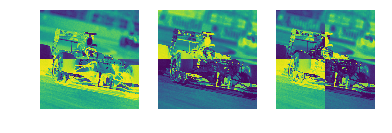

In [ ]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(b_final[i])
    plt.axis('off')

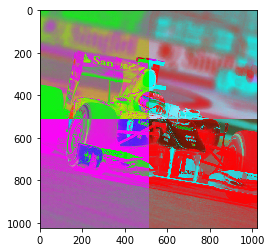

In [ ]:
# Пока имеем
plt.imshow(b)

Вычтем из единичной матрицы соотвествующего размера светлый квадрат или прямоугольник в каждом слое

In [ ]:
# единичные матрицы
a1 = np.ones((512,1024))
a2 = np.ones((512,512))

In [ ]:
# для первого слоя нижний прямоугольник светлый

In [ ]:
r1 = np.concatenate((q1,a1-q2),axis=0)

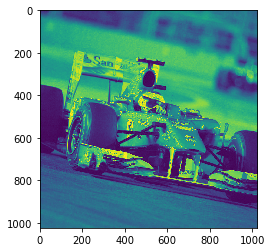

In [ ]:
plt.imshow(r1)

In [ ]:
# для второго слоя верхний прямоуголник светлый

In [ ]:
r2 = np.concatenate((a1-w1,w2),axis=0)

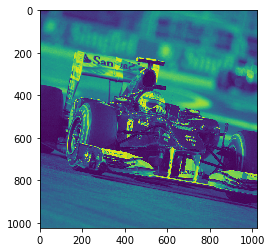

In [ ]:
plt.imshow(r2)

In [ ]:
# в третьем слое светлыми являеются угловые квадраты

In [ ]:
x1 = np.concatenate((e1[:,0:512:1],a2-e1[:,512:1024:1]),axis=1)
x2 = np.concatenate((a2 - e2[:,0:512:1],e2[:,512:1024:1]),axis=1)

In [ ]:
r3 = np.concatenate((x1,x2),axis=0)

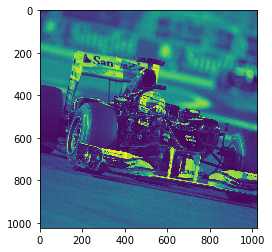

In [ ]:
plt.imshow(r3)

In [ ]:
# еще раз соеденим слои, уже исправленные

In [ ]:
v = np.zeros((1024,1024,3))

In [ ]:
v[..., 0] = r1
v[..., 1] = r2
v[..., 2] = r3

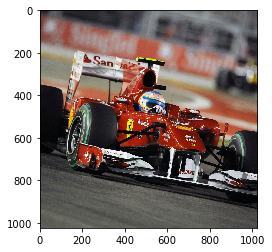

In [ ]:
plt.imshow(v)

In [ ]:
v.shape

(1024, 1024, 3)